**Comparation Swarm Algo. for
Minimal Transmission Power Providing a FullyConnected Cluster for the Internet of Things**




Tujuan penelitian yang disajikan adalah untuk menemukan daya transmisi optimal untuk setiap node dalam jaringan agar tetap terkoneksi dalam satu kluster. Hal ini menunjukkan bahwa tujuan utamanya adalah untuk mengkalkulasi daya transmisi yang spesifik untuk setiap node, bukan rata-rata daya transmisi untuk semua node.

Dengan kata lain, setiap node mungkin memerlukan daya transmisi yang berbeda tergantung pada kondisinya, posisinya, dan hubungannya dengan node lainnya dalam jaringan atau dengan kepala klusternya. Ini dilakukan untuk meminimalkan konsumsi energi sambil memastikan bahwa seluruh kluster tetap terkoneksi.

space.mat

In [ ]:
import numpy as np

matriks = np.array(
    [
        [7, -8, 3, -5, 10, -7, 10, 6, -2, 6, 3, 7, 4, 5, 3, 4, -5, -8, 4, 9],
        [9, 9, -8, 1, 10, 10, 0, -8, 9, 10, -10, 9, 5, -2, -7, -10, -10, 7, -4, -10],
    ]
)

print(matriks)

X = matriks

[[  7  -8   3  -5  10  -7  10   6  -2   6   3   7   4   5   3   4  -5  -8
    4   9]
 [  9   9  -8   1  10  10   0  -8   9  10 -10   9   5  -2  -7 -10 -10   7
   -4 -10]]


In [ ]:
import numpy as np
import random
import math

In [ ]:
import matplotlib.pyplot as plt
# Mengambil baris pertama sebagai koordinat x dan baris kedua sebagai koordinat y
posx = matriks[0]
posy = matriks[1]

'''
plt.scatter(posx, posy, color='blue')  # plot titik-titik dari matriks
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('Posisi node')
plt.grid(True)
plt.show()
'''

# Membuat plot dengan pengaturan sesuai permintaan
plt.figure(dpi=300)  # Mengatur resolusi gambar ke 300 dpi
plt.scatter(posx, posy, color='blue', label='Node Position')  # Plot titik-titik dari matriks
plt.xlabel('X Values', fontsize=12)  # Label sumbu x
plt.ylabel('Y Values', fontsize=12)  # Label sumbu y
plt.title('Node Positions', fontsize=14)  # Judul plot
plt.grid(True)  # Menambahkan grid
#plt.legend(fontsize=10)  # Menambahkan legenda dengan font kecil

# Menyimpan plot ke file PNG
plt.savefig('posisi_space.png', format='png', dpi=300, bbox_inches='tight')
plt.close()
plt.show()


In [ ]:
def friss(Gt, Gr, freq, Txp, Rxp):
  """
  This function calculates the path loss between two nodes in a wireless sensor network.

  Args:
    Gt: The transmitter antenna gain.
    Gr: The receiver antenna gain.
    freq: The frequency in MHz.
    Txp: The transmitter node position vector.
    Rxp: The receiver node position vector.

  Returns:
    The path loss in dB.
  """

  c = 3 * 10**8
  lambdax = c / (freq * 10**6)

  # Calculate the distance between transmitter and receiver, Euclidean
  dist = math.sqrt(((Rxp[0] - Txp[0])**2) + ((Rxp[1] - Txp[1])**2))

  if dist == 0:
    return math.inf
  else:
    ATT = Gt * Gr * (lambdax / (4 * math.pi * dist))**2
    ATTdb = 10 * math.log10(ATT)
    return ATTdb

In [ ]:


def connect_report(X, power_vector):
    # N is the number of nodes
    N = X.shape[1]
    freq = 915  # frequency fixed at 915MHz

    # Cost calculation
    cost = np.zeros((N, N))
    for l in range(N):
        for c in range(N):
            if l == c:
                cost[l, c] = -np.inf
            else:
                cost[l, c] = friss(1, 1, freq, X[:, l], X[:, c])

    # Converting power_vector from dBm to Watt
    power_vector_watt = 10**((power_vector / 10) - 3)

    # Counting the power received by each node
    PR = np.zeros((N, N))
    for l in range(N):
        for c in range(N):
            PR[l, c] = power_vector[l] + cost[l, c]

    # Analyzing whether there is a connection
    A = np.where(PR >= -60, 1, 0)

    D = np.sum(A, axis=1)

    connect = np.prod(D)

    if connect == 0:
        soma = np.inf
    else:
        # Finding the Laplacean Matrix of A
        L = np.zeros((N, N))
        for i in range(N):
            for j in range(N):
                if i == j:
                    L[i, j] = D[i]
                else:
                    L[i, j] = -1 if A[i, j] == 1 else 0

        autovetor = np.linalg.eigvals(L)
        autovetor_sorted = np.sort(autovetor)

        if autovetor_sorted[1] > 0:
            soma = 10 * np.log10(np.sum(power_vector_watt) / 1e-3)
        else:
            soma = np.inf

    return soma


In [ ]:
import numpy as np

def PSO(X, n, num_passos, dim, wmax, wmin, c1, c2, pMax, pMin, vMax, vMin):
    # Initialization
    vetor_potencia = pMin + (pMax - pMin) * np.random.rand(dim, n)
    velocidade = np.random.rand(dim, n)
    current_fitness = np.zeros(n)

    # Calculate initial fitness of particles
    for i in range(n):
        current_fitness[i] = connect_report(X, vetor_potencia[:, i])

    pbest_fitness = current_fitness.copy()
    pbest_position = vetor_potencia.copy()
    gbest_fitness = np.min(pbest_fitness)
    gbest_position = np.tile(pbest_position[:, np.argmin(pbest_fitness)], (dim, 1))

    for iter in range(num_passos):
        w = wmax - ((wmax - wmin) / num_passos) * iter

        # Update velocity
        for i in range(n):
            velocidade[:, i] = (w * velocidade[:, i] +
                                c1 * np.random.rand() * (pbest_position[:, i] - vetor_potencia[:, i]) +
                                #c2 * np.random.rand() * (gbest_position[:, i] - vetor_potencia[:, i]))
                                c2 * np.random.rand() * (gbest_position[:, 0] - vetor_potencia[:, i]))

        # Clamp velocities
        velocidade = np.clip(velocidade, vMin, vMax)

        # Update particle positions
        vetor_potencia += velocidade
        vetor_potencia = np.clip(vetor_potencia, pMin, pMax)

        # Evaluate new fitness
        for i in range(n):
            current_fitness[i] = connect_report(X, vetor_potencia[:, i])

        # Update pbest
        for i in range(n):
            if current_fitness[i] < pbest_fitness[i]:
                pbest_fitness[i] = current_fitness[i]
                pbest_position[:, i] = vetor_potencia[:, i]

        # Update gbest
        current_gbest_fitness = np.min(pbest_fitness)
        if current_gbest_fitness < gbest_fitness:
            gbest_fitness = current_gbest_fitness
            #gbest_position = np.tile(pbest_position[:, np.argmin(pbest_fitness)], (dim, 1))
            gbest_position = np.tile(pbest_position[:, np.argmin(pbest_fitness)].reshape(dim, 1), (1, n))

    print("vetor_potencia shape:", vetor_potencia.shape)
    print("velocidade shape:", velocidade.shape)
    print("gbest_position shape:", gbest_position.shape)

    return gbest_fitness, gbest_position[:, 0]



In [ ]:
import time
# Main body of the code
cenario = 1
print(f'Scenario = {cenario}\n\n')

for t in range(1, 2):  # Adjust as needed
    start_time = time.time()
    # The PSO parameters
    n = 30
    num_passos = 500
    dim = X.shape[1]
    wmax = 0.9
    wmin = 0.4
    c1 = 2
    c2 = 2
    pMin = -30
    pMax = 0
    vMax = 5
    vMin = -vMax

    gbest_fitness, d = PSO(X, n, num_passos, dim, wmax, wmin, c1, c2, pMax, pMin, vMax, vMin)
    print('\n\nPower of each node\n\n')
    for i in range(dim):
        print(f'Node {i+1} = {d[i]}\n')

    tempoGasto = time.time() - start_time
    print(f'\nTime spent: {tempoGasto}\n\n')


Scenario = 1


vetor_potencia shape: (20, 30)
velocidade shape: (20, 30)
gbest_position shape: (20, 30)


Power of each node


Node 1 = -17.359290918764223

Node 2 = -13.958406353985387

Node 3 = -21.423454392966907

Node 4 = -11.53089368244662

Node 5 = -18.329805932579344

Node 6 = -20.686080867521927

Node 7 = -13.448206569180197

Node 8 = -14.798694961804074

Node 9 = -14.180072451068458

Node 10 = -19.83122846095787

Node 11 = -16.795811160182144

Node 12 = -18.251041859344557

Node 13 = -14.241297501101391

Node 14 = -11.340081121740834

Node 15 = -22.290314302351533

Node 16 = -14.400876467677186

Node 17 = -10.165549409663681

Node 18 = -16.012615890589093

Node 19 = -13.482307654886506

Node 20 = -16.414671892466167


Time spent: 21.913384675979614




hasil matlab:
PSO settings
number of particles = 30.000000
Maximum number of steps = 500.000000
dimension of the problem = 20.000000
Coefficient C1 = 2.000000
Coefficient C2 = 2.000000
Inertia (wmax) = 0.900000 / (wmin) = 0.400000

pMax = 0.000000 / pMin = -30.000000
vMax = 5.000000 / vMin = -5.000000
Iteration -    1 | Sum = Inf
Iteration -   50 | Sum = -1.548922
Iteration -  100 | Sum = -1.750859
Iteration -  150 | Sum = -1.961865
Iteration -  200 | Sum = -2.315400
Iteration -  250 | Sum = -2.523361
Iteration -  300 | Sum = -2.538477
Iteration -  350 | Sum = -2.548328
Iteration -  400 | Sum = -2.549163
Iteration -  450 | Sum = -2.549185
Iteration -  500 | Sum = -2.549185


Power of each node

Nó 1= -16.047443
Nó 2= -20.354831
Nó 3= -16.288606
Nó 4= -28.026220
Nó 5= -14.827572
Nó 6= -12.583214
Nó 7= -18.187643
Nó 8= -16.130439
Nó 9= -15.919314
Nó 10= -13.947854
Nó 11= -27.712470
Nó 12= -17.433456
Nó 13= -14.875629
Nó 14= -14.028742
Nó 15= -15.662362
Nó 16= -10.238382
Nó 17= -21.340106
Nó 18= -17.558449
Nó 19= -16.288606
Nó 20= -13.838523


Time spent: 2.168302e+00

In [ ]:
gbest_fitness

-1.7758518447596643

In [ ]:
def simplistic_method(X, pMin, pMax, deltaP):
    dim = X.shape[1]
    initial_power = (pMax + pMin) / 2
    transmission_powers = np.full(dim, initial_power)

    current_connectivity = connect_report(X, transmission_powers)

    if current_connectivity != np.inf:
        # Jika jaringan terhubung dengan daya awal
        while True:
            transmission_powers -= deltaP
            if connect_report(X, transmission_powers) == np.inf:
                # Kembali ke daya transmisi terakhir yang membuat jaringan terkoneksi
                transmission_powers += deltaP
                break
    else:
        # Jika jaringan tidak terhubung dengan daya awal
        while True:
            transmission_powers += deltaP
            if connect_report(X, transmission_powers) != np.inf:
                break

    return transmission_powers

# Main body of the simplistic method
print(f'Scenario = {cenario} (Simplistic)\n\n')
start_time = time.time()

deltaP = 1  # Anda bisa menyesuaikan nilai ini sesuai dengan kebutuhan
powers_simplistic = simplistic_method(X, pMin, pMax, deltaP)
print('\n\nPower of each node (Simplistic Method)\n\n')
for i in range(dim):
    print(f'Node {i+1} = {powers_simplistic[i]}\n')

tempoGasto = time.time() - start_time
print(f'\nTime spent: {tempoGasto}\n\n')


Scenario = 1 (Simplistic)




Power of each node (Simplistic Method)


Node 1 = -10.0

Node 2 = -10.0

Node 3 = -10.0

Node 4 = -10.0

Node 5 = -10.0

Node 6 = -10.0

Node 7 = -10.0

Node 8 = -10.0

Node 9 = -10.0

Node 10 = -10.0

Node 11 = -10.0

Node 12 = -10.0

Node 13 = -10.0

Node 14 = -10.0

Node 15 = -10.0

Node 16 = -10.0

Node 17 = -10.0

Node 18 = -10.0

Node 19 = -10.0

Node 20 = -10.0


Time spent: 0.03231453895568848




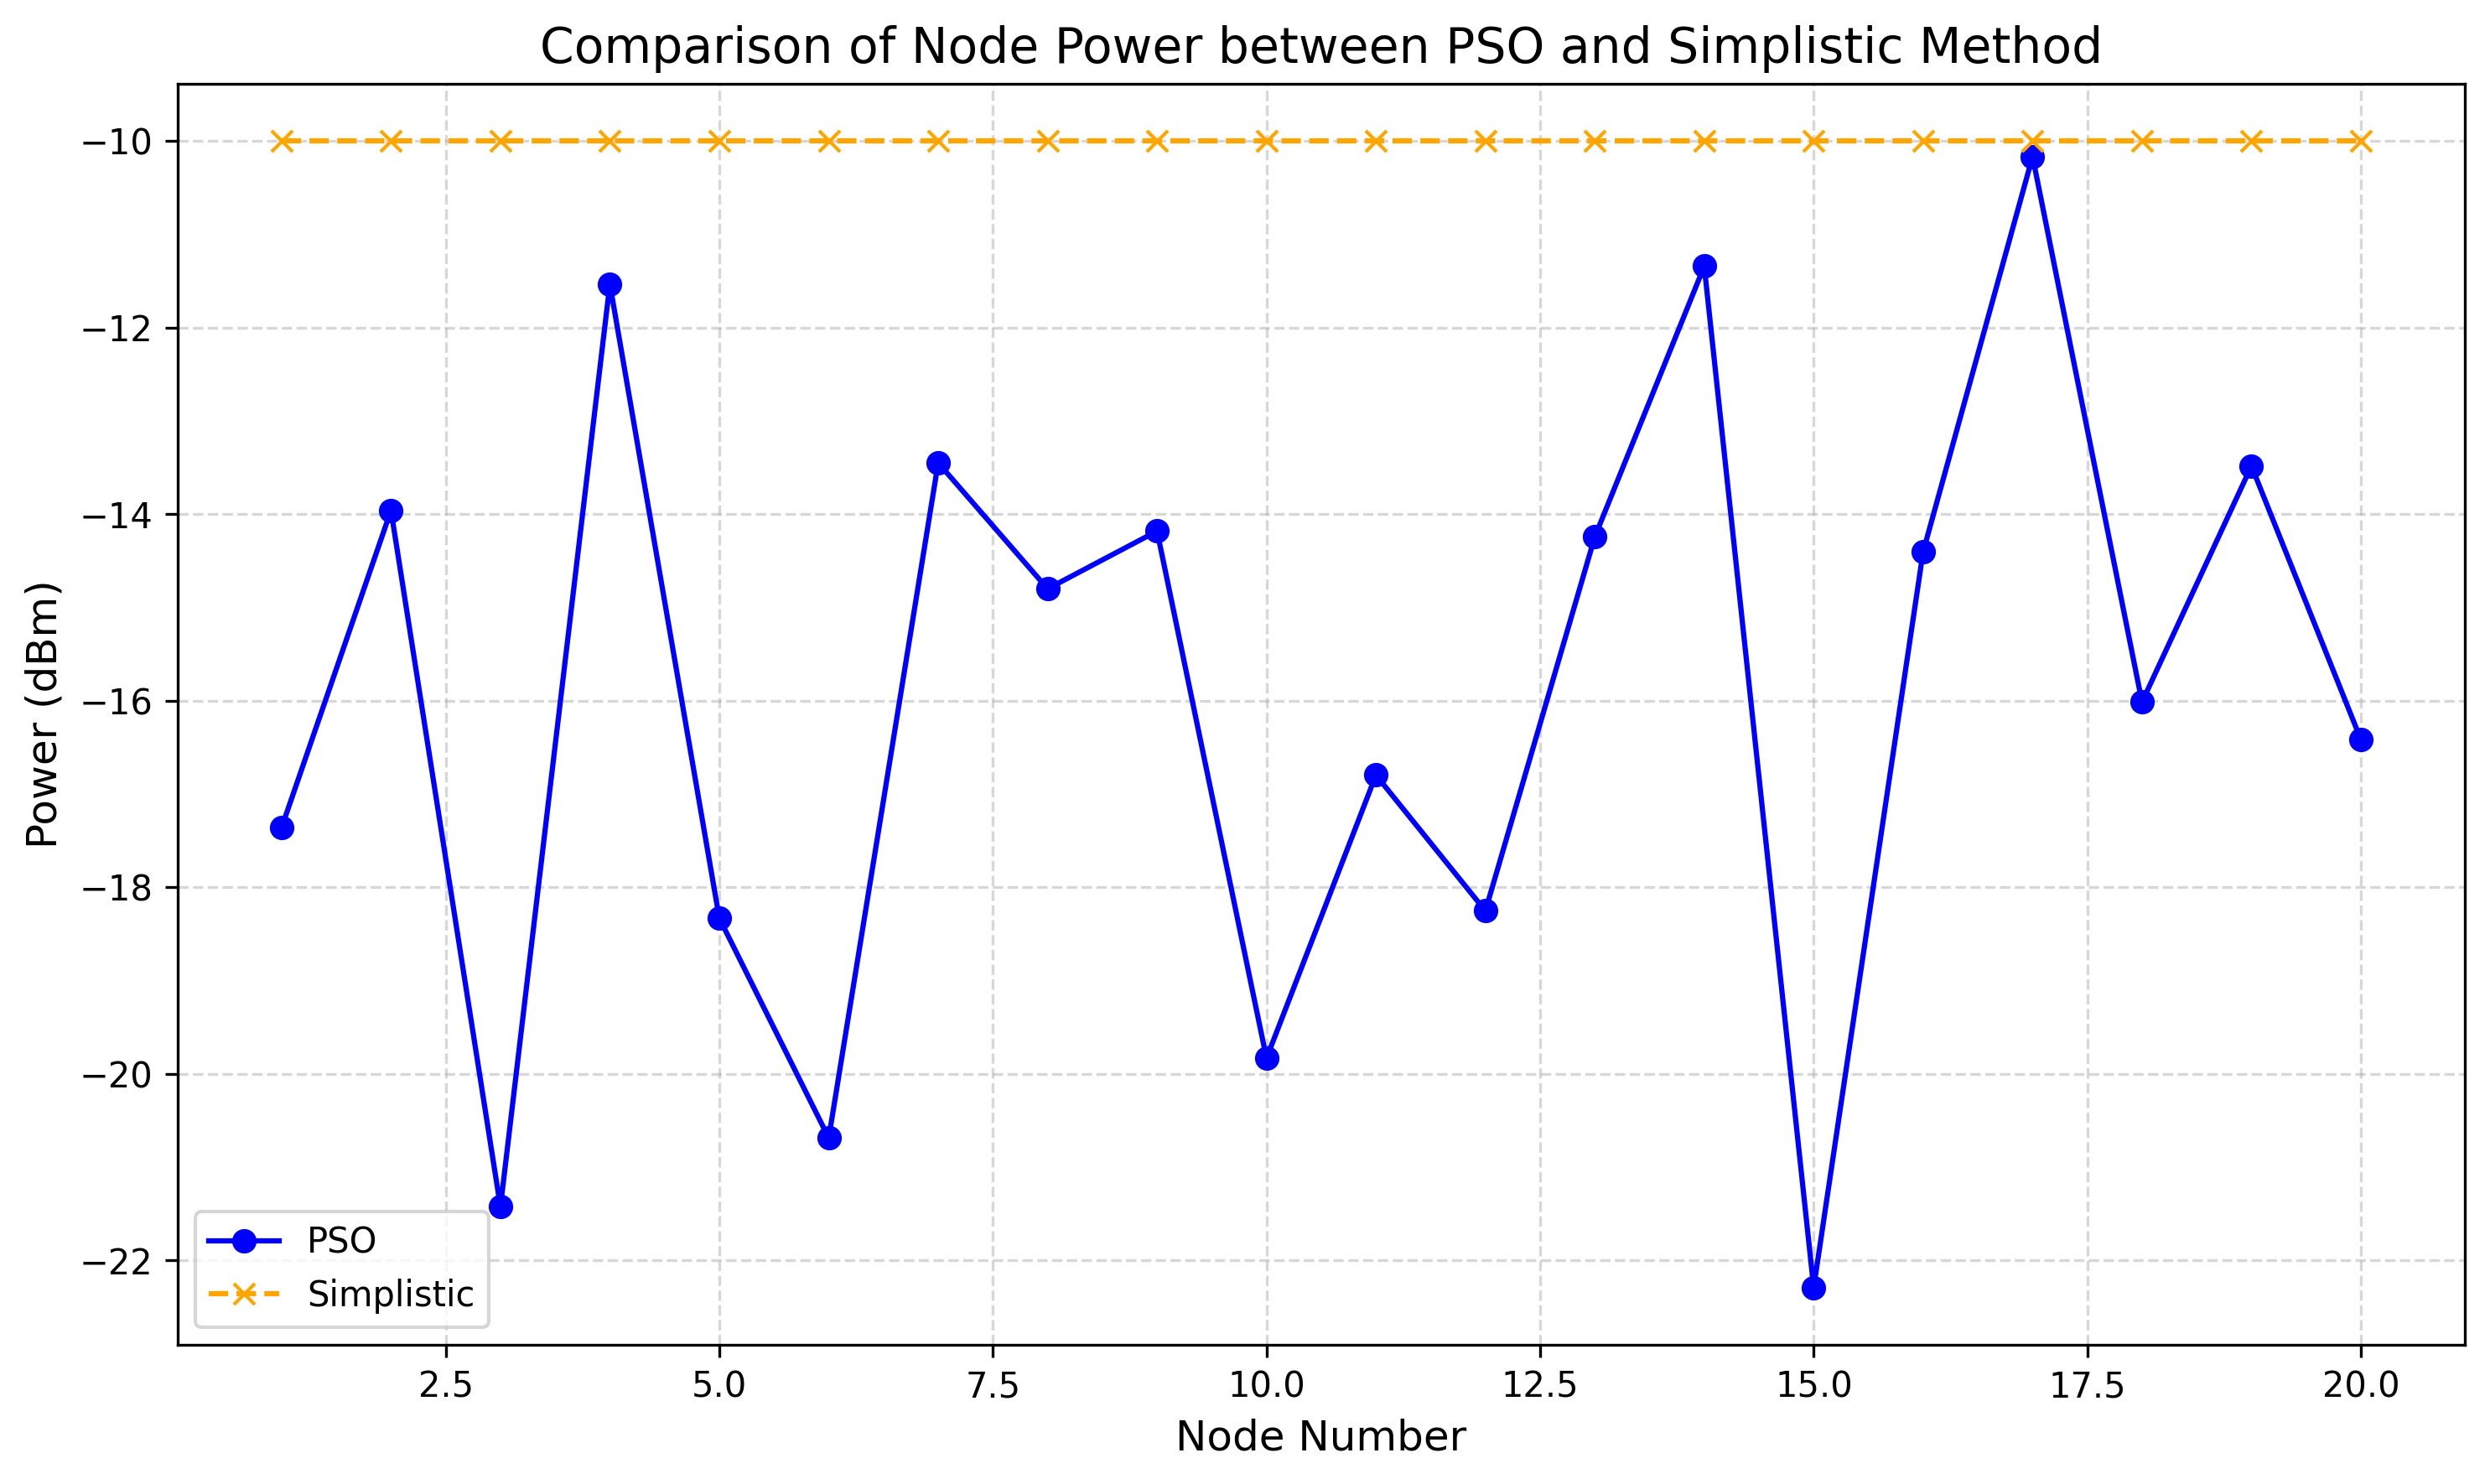

In [ ]:
import matplotlib.pyplot as plt

# Hasil dari kedua metode (anggap Anda sudah memiliki data ini)
nodes = list(range(1, 21))  # asumsi Anda memiliki 20 node
'''
power_pso = [-13.97, -20.42, -28.32, -11.79, -17.96, -16.28, -13.61, -13.52, -13.37, -19.69,
             -21.47, -14.35, -14.34, -13.78, -24.18, -12.66, -10.22, -17.46, -17.19, -17.01]  # contoh data dari PSO
'''
power_simplistic = [-10.0]*20  # karena semua node memiliki kekuatan -10.0 dalam metode Simplistic


power_pso = d

'''
# Membuat plot
plt.figure(figsize=(10, 6))
plt.plot(nodes, power_pso, marker='o', label='PSO')
plt.plot(nodes, powers_simplistic, marker='x', label='Simplistic', linestyle='--')
plt.xlabel('Node Number')
plt.ylabel('Power (dBm)')
plt.title('Comparison of Node Power between PSO and Simplistic Method')
plt.legend()
plt.grid(True)
plt.show()
'''
# Membuat plot
plt.figure(figsize=(10, 6), dpi=300)
plt.plot(nodes, power_pso, marker='o', label='PSO', color='blue')
plt.plot(nodes, power_simplistic, marker='x', label='Simplistic', linestyle='--', color='orange')
plt.xlabel('Node Number', fontsize=12)
plt.ylabel('Power (dBm)', fontsize=12)
plt.title('Comparison of Node Power between PSO and Simplistic Method', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Menyimpan plot ke file
output_file = "pso vs simplistic.png"
plt.savefig(output_file, format='png', dpi=300)
plt.show()

In [ ]:
#test
Gt = 1
Gr = 1
freq = 915
Txp = [1, 1]
Rxp = [4, 5]

path_loss = friss(Gt, Gr, freq, Txp, Rxp)
print(f"Path loss antara Node A dan Node B adalah: {path_loss:.2f} dB")

Gt = 1
Gr = 1
freq = 915
Txp = [1, 1]
Rxp = [14, 15]

path_loss = friss(Gt, Gr, freq, Txp, Rxp)
print(f"Path loss antara Node A dan Node B adalah: {path_loss:.2f} dB")

#jarak antar node yang dicek semakin besar maka loss semakin besar

Path loss antara Node A dan Node B adalah: -45.65 dB
Path loss antara Node A dan Node B adalah: -57.29 dB


* simplistic
* pso
* Chicken Swarm Optimization
* Novel meta-heuristic bald eagle search optimisation algorithm
* Genetic algorithm
* Grey Wolf Optimizer
* simulannealbnd
* SSA
* Tuna swarm optimization
* Whale Optimization Algorithm (WOA)


In [ ]:
def CSO(X, n, num_passos, target_func, lb, ub):

    num_nodes = X.shape[1]

    # If no initial positions provided, generate them randomly
    if lb is None or ub is None:
        chickens = np.random.uniform(-30, 0, (n, num_nodes))
    else:
        chickens = np.random.uniform(lb, ub, (n, num_nodes))

    # Calculate initial fitness of chickens
    fitness = np.apply_along_axis(target_func, 1, chickens)

    for iteration in range(num_passos):
        sorted_idx = np.argsort(fitness)
        chickens = chickens[sorted_idx]
        fitness = fitness[sorted_idx]

        for i in range(n):
            if i < n * 0.25:  # Roosters
                r1, r2 = np.random.rand(), np.random.rand()
                chickens[i] += r1 * (chickens[0] - chickens[i]) + r2 * (chickens[1] - chickens[i])
            elif i < n * 0.5:  # Hens
                r = np.random.rand()
                chickens[i] += r * (chickens[0] - chickens[i])
            elif i < n * 0.75:  # Chicks
                r = np.random.rand()
                chickens[i] -= r * (chickens[-1] - chickens[i])
            else:  # Rooster
                chickens[i] = np.random.uniform(lb, ub, num_nodes)

            chickens[i] = np.clip(chickens[i], lb, ub)
            new_fitness = target_func(chickens[i])
            if new_fitness < fitness[i]:
                fitness[i] = new_fitness

    best_idx = np.argmin(fitness)
    return fitness[best_idx], chickens[best_idx]


In [ ]:
def wrapped_connect_report(power_vector):
    return connect_report(X, power_vector)

In [ ]:
import time
import numpy as np


# Bagian utama dari program yang menggunakan CSO
cenario = "Optimasi Berbasis CSO"
print(f'Scenario = {cenario}\n\n')

for t in range(1, 2):  # Sesuaikan sesuai kebutuhan
    start_time = time.time()

    # Parameter CSO
    n = 30  # Jumlah ayam (chickens)
    num_passos = 500  # Jumlah langkah
    dim = X.shape[1]
    lb = [pMin] * dim
    ub = [pMax] * dim
    pMin = -30
    pMax = 0

    # Note: 'X' in this case should be the position matrix of the wireless nodes
    #best_fitness, powers_cso = CSO(X, n, num_passos, connect_report, lb, ub)
    best_fitness, powers_cso = CSO(X, n, num_passos, wrapped_connect_report, lb, ub)

    print('\n\nPower of each node (Metode CSO)\n\n')
    for i in range(dim):
        print(f'Node {i+1} = {powers_cso[i]}\n')

    tempoGasto = time.time() - start_time
    print(f'\nWaktu yang dihabiskan: {tempoGasto}\n\n')


Scenario = Optimasi Berbasis CSO




Power of each node (Metode CSO)


Node 1 = -19.297021837017407

Node 2 = -10.725680527318445

Node 3 = -11.831016369877224

Node 4 = -10.901737380042961

Node 5 = -13.84595790470875

Node 6 = -10.404099592446613

Node 7 = -10.949387277155536

Node 8 = -15.387980118481885

Node 9 = -9.141054973368142

Node 10 = -15.402143162100426

Node 11 = -13.990905729583176

Node 12 = -17.573291550610122

Node 13 = -11.664863074835724

Node 14 = -14.25407763433721

Node 15 = -11.698229429409368

Node 16 = -14.867882008016855

Node 17 = -9.998217698130995

Node 18 = -17.996412280072033

Node 19 = -19.069113237997858

Node 20 = -15.832975098791126


Waktu yang dihabiskan: 21.231935501098633




In [ ]:
best_fitness

0.16935166605638535

In [ ]:
import time
import numpy as np

def BESO(X, n, num_passos, target_func, lb, ub):

    eagles = np.random.uniform(lb, ub, (n, len(lb)))
    fitness = np.apply_along_axis(target_func, 1, eagles)
    alpha_eagle = eagles[np.argmin(fitness)]

    for _ in range(num_passos):

        for i in range(n):

            # Hunting phase
            r1 = np.random.random()
            r2 = np.random.random()
            if r1 < 0.5:
                eagles[i] = alpha_eagle + r2 * (alpha_eagle - eagles[i])
            else:
                eagles[i] = np.random.uniform(lb, ub)

            # Boundary constraint
            eagles[i] = np.clip(eagles[i], lb, ub)

            # Calculate fitness
            current_fitness = target_func(eagles[i])
            if current_fitness < fitness[i]:
                fitness[i] = current_fitness

        alpha_eagle = eagles[np.argmin(fitness)]

    best_idx = np.argmin(fitness)
    return fitness[best_idx], eagles[best_idx]

# Bagian utama dari program yang menggunakan BESO
cenario = "Optimasi Berbasis BESO"
print(f'Scenario = {cenario}\n\n')

for t in range(1, 2):  # Sesuaikan sesuai kebutuhan
    start_time = time.time()

    # Parameter BESO
    n = 30  # Jumlah elang (eagles)
    num_passos = 500  # Jumlah langkah
    dim = X.shape[1]
    pMin = -30
    pMax = 0
    lb = [pMin] * dim
    ub = [pMax] * dim

    # Note: 'X' in this case should be the position matrix of the wireless nodes
    best_fitness, powers_beso = BESO(X, n, num_passos, wrapped_connect_report, lb, ub)

    print('\n\nPower of each node (Metode BESO)\n\n')
    for i in range(dim):
        print(f'Node {i+1} = {powers_beso[i]}\n')

    tempoGasto = time.time() - start_time
    print(f'\nWaktu yang dihabiskan: {tempoGasto}\n\n')


Scenario = Optimasi Berbasis BESO




Power of each node (Metode BESO)


Node 1 = -23.77298804282412

Node 2 = -10.241269886589741

Node 3 = -18.13777137957137

Node 4 = -6.01729257453324

Node 5 = -0.45643102448530826

Node 6 = -7.939260794496715

Node 7 = -28.01532607312178

Node 8 = -8.817575063870763

Node 9 = -19.11202316772211

Node 10 = -1.9865492436387093

Node 11 = -9.431108100739326

Node 12 = -24.07720432592329

Node 13 = -15.498894551827375

Node 14 = -11.243191093423633

Node 15 = -16.28156118135479

Node 16 = -6.32885762133958

Node 17 = -3.9813175909067127

Node 18 = -22.794777413141247

Node 19 = -5.272435836610416

Node 20 = -3.496818477021783


Waktu yang dihabiskan: 20.380751132965088




In [ ]:
best_fitness

4.836220701926232

In [ ]:
def GA(X, n, num_passos, target_func, lb, ub, crossover_rate=0.8, mutation_rate=0.07):
    #mutation_rate 0.07 lewat dari inf, lebih eksploratif
    # 1. Initialize population
    population = np.random.uniform(lb, ub, (n, len(lb)))

    # Define the number of elite individuals
    n_elite = int(0.2 * n)

    for _ in range(num_passos):
        # 2. Evaluate fitness
        fitness = np.apply_along_axis(target_func, 1, population)

        # Save the elite individuals
        elite_idx = np.argsort(fitness)[:n_elite]
        elite_individuals = population[elite_idx]

        # 3. Select parents
        parents_idx = np.argsort(fitness)[:n]
        parents = population[parents_idx]

        offspring = []

        for i in range(0, n - n_elite, 2):  # Adjust the range to make room for elite individuals

            # 4. Crossover
            if np.random.random() < crossover_rate:
                crossover_point = np.random.randint(1, len(lb)-1)
                offspring1 = np.concatenate((parents[i][:crossover_point], parents[i+1][crossover_point:]))
                offspring2 = np.concatenate((parents[i+1][:crossover_point], parents[i][crossover_point:]))


            else:
                offspring1, offspring2 = parents[i], parents[i+1]

            offspring1 = np.clip(offspring1, lb, ub)
            offspring2 = np.clip(offspring2, lb, ub)

            # 5. Mutation
            if np.random.random() < mutation_rate:
                mutation_point = np.random.randint(len(lb))
                offspring1[mutation_point] = np.random.uniform(lb[mutation_point], ub[mutation_point])
            if np.random.random() < mutation_rate:
                mutation_point = np.random.randint(len(lb))
                offspring2[mutation_point] = np.random.uniform(lb[mutation_point], ub[mutation_point])

            offspring1 = np.clip(offspring1, lb, ub)
            offspring2 = np.clip(offspring2, lb, ub)

            offspring.extend([offspring1, offspring2])

        # 6. Select next generation
        # Include the elite individuals in the new population
        offspring = offspring[:n - n_elite]  # Truncate if needed
        population = np.vstack([elite_individuals, offspring])

    # Getting the best solution after iterating finishing all generations.
    fitness = np.apply_along_axis(target_func, 1, population)
    best_idx = np.argmin(fitness)
    print(fitness)
    return fitness[best_idx], population[best_idx]

#BARU
# Bagian utama dari program yang menggunakan GA
cenario = "Optimasi Berbasis GA"
print(f'Scenario = {cenario}\n\n')

for t in range(1, 2):  # Sesuaikan sesuai kebutuhan
    start_time = time.time()

    # Parameter GA
    n = 30  # Jumlah individu
    num_passos = 500  # Jumlah generasi
    dim = X.shape[1]
    pMin = -30
    pMax = 0
    lb = [pMin] * dim
    ub = [pMax] * dim

    best_fitness, powers_ga = GA(X, n, num_passos, wrapped_connect_report, lb, ub)

    print('\n\nPower of each node (Metode GA)\n\n')
    for i in range(dim):
        print(f'Node {i+1} = {powers_ga[i]}\n')

    tempoGasto = time.time() - start_time
    print(f'\nWaktu yang dihabiskan: {tempoGasto}\n\n')

    print(f'\nBest fitness: {best_fitness}\n\n')

Scenario = Optimasi Berbasis GA


[-2.0635784  -2.0635784  -2.0635784  -2.0635784  -2.0635784  -2.0635784
 -2.0635784  -2.0635784  -2.0635784  -2.0635784  -2.0635784  -2.0635784
 -2.0635784  -2.0635784          inf -1.86035922         inf -1.86035922
 -1.2917354  -2.0635784  -1.46949733 -1.46949733 -1.2917354  -1.46949733
 -1.2917354  -1.2917354  -1.2917354  -1.2917354  -1.2917354  -1.2917354 ]


Power of each node (Metode GA)


Node 1 = -28.804189915956467

Node 2 = -23.823081138684465

Node 3 = -24.073441923242886

Node 4 = -10.200354303549716

Node 5 = -18.00723981427071

Node 6 = -24.0094099506966

Node 7 = -13.018679592814024

Node 8 = -13.481801825991681

Node 9 = -13.923307111934701

Node 10 = -23.860982394794128

Node 11 = -25.43221548034678

Node 12 = -23.828468110503046

Node 13 = -9.160267449528337

Node 14 = -15.229785145590109

Node 15 = -17.472260310370096

Node 16 = -23.905299893790165

Node 17 = -9.52929857495026

Node 18 = -21.79888425327605

Node 19 = -16.732982112234

In [ ]:
import numpy as np
import time

def wrapped_connect_report(X, position_vector):
    return connect_report(X, position_vector)

def GWO(X, n, num_passos, target_func, lb, ub):
    # 1. Initialize the wolf population
    population = np.random.uniform(0, 1, (n, len(lb))) * (np.array(ub) - np.array(lb)) + np.array(lb)

    Alpha_position = np.zeros(len(lb))
    Alpha_score = float('inf')

    Beta_position = np.zeros(len(lb))
    Beta_score = float('inf')

    Delta_position = np.zeros(len(lb))
    Delta_score = float('inf')

    for i in range(num_passos):
        for j in range(n):
            fitness = target_func(X, population[j])

            if fitness < Alpha_score:
                Delta_position = np.copy(Beta_position)
                Delta_score = Beta_score

                Beta_position = np.copy(Alpha_position)
                Beta_score = Alpha_score

                Alpha_position = np.copy(population[j])
                Alpha_score = fitness

            if fitness > Alpha_score and fitness < Beta_score:
                Delta_position = np.copy(Beta_position)
                Delta_score = Beta_score

                Beta_position = np.copy(population[j])
                Beta_score = fitness

            if fitness > Alpha_score and fitness > Beta_score and fitness < Delta_score:
                Delta_position = np.copy(population[j])
                Delta_score = fitness

        a = 2 - i * ((2) / num_passos)
        for j in range(n):
            for k in range(len(lb)):
                r1 = np.random.random()
                r2 = np.random.random()

                A1 = 2 * a * r1 - a
                C1 = 2 * r2

                D_alpha = abs(C1 * Alpha_position[k] - population[j][k])
                X1 = Alpha_position[k] - A1 * D_alpha

                r1 = np.random.random()
                r2 = np.random.random()

                A2 = 2 * a * r1 - a
                C2 = 2 * r2

                D_beta = abs(C2 * Beta_position[k] - population[j][k])
                X2 = Beta_position[k] - A2 * D_beta

                r1 = np.random.random()
                r2 = np.random.random()

                A3 = 2 * a * r1 - a
                C3 = 2 * r2

                D_delta = abs(C3 * Delta_position[k] - population[j][k])
                X3 = Delta_position[k] - A3 * D_delta

                population[j][k] = (X1 + X2 + X3) / 3

                if population[j][k] > ub[k]:
                    population[j][k] = ub[k]
                if population[j][k] < lb[k]:
                    population[j][k] = lb[k]

    return Alpha_score, Alpha_position

# Bagian utama dari program yang menggunakan GWO
cenario = "Optimasi Berbasis GWO"
print(f'Scenario = {cenario}\n\n')

for t in range(1, 2):  # Sesuaikan sesuai kebutuhan
    start_time = time.time()

    dim = X.shape[1]
    pMin = -30
    pMax = 0
    lb = [pMin] * dim
    ub = [pMax] * dim

    best_fitness, powers_gwo = GWO(X, 30, 500, wrapped_connect_report, lb, ub)

    print('\n\nPower of each node (Metode GWO)\n\n')
    for i in range(dim):
        print(f'Node {i+1} = {powers_gwo[i]}\n')

    tempoGasto = time.time() - start_time
    print(f'\nWaktu yang dihabiskan: {tempoGasto}\n\n')


Scenario = Optimasi Berbasis GWO




Power of each node (Metode GWO)


Node 1 = -24.295356216281103

Node 2 = -22.264019643229286

Node 3 = -20.612543675270633

Node 4 = -11.787762385263349

Node 5 = -18.271554581741654

Node 6 = -20.87146527777365

Node 7 = -13.66881681509813

Node 8 = -18.69532893696665

Node 9 = -14.15012355436536

Node 10 = -23.493636342947678

Node 11 = -24.643574733851068

Node 12 = -27.32805421137661

Node 13 = -14.21214984112249

Node 14 = -18.904240332707893

Node 15 = -20.578581777248413

Node 16 = -23.46952026765246

Node 17 = -10.267911536948588

Node 18 = -0.02296826886060029

Node 19 = -17.947472317929435

Node 20 = -0.018964585385224098


Waktu yang dihabiskan: 21.07533311843872




In [ ]:
best_fitness

1.5702144063654535

In [ ]:
#EGWO
import numpy as np
import time

def wrapped_connect_report(X, position_vector):
    return connect_report(X, position_vector)

def EGWO(X, n, num_passos, target_func, lb, ub):
    # 1. Initialize the wolf population
    population = np.random.uniform(0, 1, (n, len(lb))) * (np.array(ub) - np.array(lb)) + np.array(lb)

    Alpha_position = np.zeros(len(lb))
    Alpha_score = float('inf')

    Beta_position = np.zeros(len(lb))
    Beta_score = float('inf')

    Delta_position = np.zeros(len(lb))
    Delta_score = float('inf')

    for i in range(num_passos):
        for j in range(n):
            fitness = target_func(X, population[j])

            if fitness < Alpha_score:
                Delta_position = np.copy(Beta_position)
                Delta_score = Beta_score

                Beta_position = np.copy(Alpha_position)
                Beta_score = Alpha_score

                Alpha_position = np.copy(population[j])
                Alpha_score = fitness

            if fitness > Alpha_score and fitness < Beta_score:
                Delta_position = np.copy(Beta_position)
                Delta_score = Beta_score

                Beta_position = np.copy(population[j])
                Beta_score = fitness

            if fitness > Alpha_score and fitness > Beta_score and fitness < Delta_score:
                Delta_position = np.copy(population[j])
                Delta_score = fitness

        #a = 2 - i * ((2) / num_passos)
        a = 2 * np.cos(i* np.pi /(2 * num_passos))
        # alternatif non linear
        # a =

        for j in range(n):
            for k in range(len(lb)):
                r1 = np.random.random()
                r2 = np.random.random()

                A1 = 2 * a * r1 - a
                C1 = 2 * r2

                D_alpha = abs(C1 * Alpha_position[k] - population[j][k])
                X1 = Alpha_position[k] - A1 * D_alpha

                r1 = np.random.random()
                r2 = np.random.random()

                A2 = 2 * a * r1 - a
                C2 = 2 * r2

                D_beta = abs(C2 * Beta_position[k] - population[j][k])
                X2 = Beta_position[k] - A2 * D_beta

                r1 = np.random.random()
                r2 = np.random.random()

                A3 = 2 * a * r1 - a
                C3 = 2 * r2

                D_delta = abs(C3 * Delta_position[k] - population[j][k])
                X3 = Delta_position[k] - A3 * D_delta

                population[j][k] = (X1 + X2 + X3) / 3

                if population[j][k] > ub[k]:
                    population[j][k] = ub[k]
                if population[j][k] < lb[k]:
                    population[j][k] = lb[k]

    return Alpha_score, Alpha_position

# Bagian utama dari program yang menggunakan GWO
cenario = "Optimasi Berbasis EGWO"
print(f'Scenario = {cenario}\n\n')

for t in range(1, 2):  # Sesuaikan sesuai kebutuhan
    start_time = time.time()

    dim = X.shape[1]
    pMin = -30
    pMax = 0
    lb = [pMin] * dim
    ub = [pMax] * dim

    best_fitness, powers_egwo = EGWO(X, 30, 500, wrapped_connect_report, lb, ub)

    print('\n\nPower of each node (Metode EGWO)\n\n')
    for i in range(dim):
        print(f'Node {i+1} = {powers_egwo[i]}\n')

    tempoGasto = time.time() - start_time
    print(f'\nWaktu yang dihabiskan: {tempoGasto}\n\n')

    print(f'\nbest fitness: {best_fitness}\n\n')


Scenario = Optimasi Berbasis EGWO




Power of each node (Metode EGWO)


Node 1 = -21.382075396919475

Node 2 = -23.738202485214032

Node 3 = -21.09401776573578

Node 4 = -11.74396286016208

Node 5 = -16.58014674088437

Node 6 = -20.790705105456748

Node 7 = -13.619276509928048

Node 8 = -17.214039073897442

Node 9 = -14.154764982544856

Node 10 = -21.318532577151647

Node 11 = -22.052583175264772

Node 12 = -28.81183647580751

Node 13 = -14.294301197581886

Node 14 = -20.187140679157185

Node 15 = -23.51646156863554

Node 16 = -23.818158485877365

Node 17 = -10.254627677064166

Node 18 = -20.607023973262315

Node 19 = -17.856663951247207

Node 20 = -17.18775400060283


Waktu yang dihabiskan: 20.77193546295166



best fitness: -3.7039992593715922




In [ ]:
import time
import numpy as np

def simulated_annealing(X, target_func, lb, ub, max_iter=1000, initial_temp=200, cooling_rate=0.995):
    # Initialize solution randomly
    current_solution = np.random.uniform(lb, ub)
    current_fitness = target_func(X, current_solution)  # Modified this line to pass X as well

    best_solution = np.copy(current_solution)
    best_fitness = current_fitness

    temperature = initial_temp

    for iteration in range(max_iter):
        # Perturb the solution slightly
        perturbation = np.random.uniform(-1, 1, size=current_solution.shape)
        new_solution = current_solution + perturbation

        # Ensure solution remains within bounds
        new_solution = np.clip(new_solution, lb, ub)

        new_fitness = target_func(X, new_solution)  # Modified this line to pass X as well


        # Check if new solution is better or if it is accepted with a certain probability
        if new_fitness < current_fitness or np.random.rand() < np.exp((current_fitness - new_fitness) / temperature):
            current_solution = new_solution
            current_fitness = new_fitness

            # Update the best solution if necessary
            if new_fitness < best_fitness:
                best_solution = np.copy(new_solution)
                best_fitness = new_fitness


        # Reduce temperature
        temperature *= cooling_rate

    return best_fitness, best_solution


# Bagian utama dari program yang menggunakan Simulated Annealing
cenario = "Optimasi Berbasis Simulated Annealing"
print(f'Scenario = {cenario}\n\n')

for t in range(1, 2):  # Sesuaikan sesuai kebutuhan
    start_time = time.time()

    # Parameter Simulated Annealing
    dim = X.shape[1]
    pMin = -30
    pMax = 0
    lb = [pMin] * dim
    ub = [pMax] * dim

    best_fitness, powers_sa = simulated_annealing(X, wrapped_connect_report, lb, ub)

    print('\n\nPower of each node (Metode Simulated Annealing)\n\n')
    for i in range(dim):
        print(f'Node {i+1} = {powers_sa[i]}\n')

    tempoGasto = time.time() - start_time
    print(f'\nWaktu yang dihabiskan: {tempoGasto}\n\n')
    print(f'best_fitness: {best_fitness}\n\n')


Scenario = Optimasi Berbasis Simulated Annealing




Power of each node (Metode Simulated Annealing)


Node 1 = -23.18460279113647

Node 2 = -0.08143618876445302

Node 3 = -3.5576051522866052

Node 4 = -14.029110116363036

Node 5 = -22.694445325154348

Node 6 = -9.174009647685715

Node 7 = -0.3951572698065213

Node 8 = -5.466732910468497

Node 9 = -24.44807542937598

Node 10 = -18.332416923231857

Node 11 = -5.078397496475869

Node 12 = -1.3640460882203733

Node 13 = -0.6524740315966326

Node 14 = -14.327825687658047

Node 15 = -18.059746303427538

Node 16 = -1.5275577771698465

Node 17 = -1.883843009804675

Node 18 = -6.973548323974985

Node 19 = -0.3840352156732578

Node 20 = -2.8593172496012826


Waktu yang dihabiskan: 1.6966280937194824


best_fitness: inf




In [ ]:
best_fitness

inf

In [ ]:
#Simulated Annealing for the Salp Swarm Algorithm (SSA)

def SSA(X, target_func, lb, ub, n=30, num_passos=500):
    # 1. Initialize a population of salps
    population = np.random.uniform(low=lb, high=ub, size=(n, len(lb)))
    fitness = np.apply_along_axis(lambda salp: target_func(X, salp), 1, population)
    best_idx = np.argmin(fitness)
    best_position = np.copy(population[best_idx])
    best_fitness = fitness[best_idx]

    # 2. Main loop
    for iter in range(num_passos):
        # 2.1 Update position of the first salp (leader)
        c1 = 2 * np.exp(-((4 * iter) / num_passos)**2)
        for j in range(len(lb)):
            if np.random.uniform() < 0.5:
                population[0][j] = best_position[j] + c1 * np.random.uniform(-1, 1) * np.abs(best_position[j] - population[np.random.choice(n)][j])
            else:
                population[0][j] = best_position[j] + np.random.uniform(-1, 1) * (ub[j] - lb[j])

        # Clip to bounds
        population[0] = np.clip(population[0], lb, ub)

        # 2.2 Update positions of the subsequent salps
        for i in range(1, n):
            population[i] = population[i] + np.random.uniform(-1, 1) * (population[i-1] - population[i])
            # Clip to bounds
            population[i] = np.clip(population[i], lb, ub)

        # 2.3 Evaluate the updated salps
        fitness = np.apply_along_axis(lambda salp: target_func(X, salp), 1, population)
        current_best_idx = np.argmin(fitness)
        if fitness[current_best_idx] < best_fitness:
            best_fitness = fitness[current_best_idx]
            best_position = np.copy(population[current_best_idx])

    # 3. Return the best solution
    return best_fitness, best_position

# Integrate into the main program
cenario = "Optimasi Berbasis SSA"
print(f'Scenario = {cenario}\n\n')

for t in range(1, 2):
    start_time = time.time()

    dim = X.shape[1]
    lb = [pMin] * dim
    ub = [pMax] * dim

    best_fitness, powers_ssa = SSA(X, wrapped_connect_report, lb, ub)

    print('\n\nPower of each node (Metode SSA)\n\n')
    for i in range(dim):
        print(f'Node {i+1} = {powers_ssa[i]}\n')

    tempoGasto = time.time() - start_time
    print(f'\nWaktu yang dihabiskan: {tempoGasto}\n\n')


Scenario = Optimasi Berbasis SSA




Power of each node (Metode SSA)


Node 1 = -28.048266414039755

Node 2 = -18.497411279154758

Node 3 = -28.295793311931615

Node 4 = -25.940930962080834

Node 5 = -21.044825149283877

Node 6 = -10.652400036783497

Node 7 = -21.792437788699523

Node 8 = -22.16897577197662

Node 9 = -27.485487887961078

Node 10 = -23.923866549448363

Node 11 = -27.472199403284158

Node 12 = -20.982181194827437

Node 13 = -7.325881346716958

Node 14 = -6.4644753505208

Node 15 = -4.956408474077502

Node 16 = -13.80977775458486

Node 17 = -21.10327363193061

Node 18 = -21.17455469039864

Node 19 = -26.329075248827564

Node 20 = -6.026235016946099


Waktu yang dihabiskan: 21.238738298416138




In [ ]:
best_fitness

inf

In [ ]:
#Tuna Swarm Optimization (TSO)
def TSO(X, target_func, lb, ub, n=30, num_passos=1000):
    # Initialize tuna population
    population = np.random.uniform(low=lb, high=ub, size=(n, len(lb)))
    fitness = np.apply_along_axis(lambda tuna: target_func(X, tuna), 1, population)
    best_idx = np.argmin(fitness)
    best_position = np.copy(population[best_idx])
    best_fitness = fitness[best_idx]

    # Main loop
    for iter in range(num_passos):
        for i in range(n):
            # Compute a random tuna for interaction
            j = np.random.randint(0, n)
            while i == j:
                j = np.random.randint(0, n)

            # Move towards or away based on the fitness difference
            if fitness[i] < fitness[j]:
                for d in range(len(lb)):
                    r1 = np.random.uniform()
                    r2 = np.random.uniform()
                    population[i][d] = population[i][d] + r1 * (population[j][d] - population[i][d]) + r2 * (best_position[d] - population[i][d])
            else:
                for d in range(len(lb)):
                    r1 = np.random.uniform()
                    population[i][d] = population[i][d] - r1 * (population[j][d] - population[i][d])

            # Clip to bounds
            population[i] = np.clip(population[i], lb, ub)
            # Update fitness
            current_fitness = target_func(X, population[i])
            if current_fitness < fitness[i]:
                fitness[i] = current_fitness
                if current_fitness < best_fitness:
                    best_fitness = current_fitness
                    best_position = np.copy(population[i])

    # Return the best solution
    return best_fitness, best_position

# Integrate into the main program
cenario = "Optimasi Berbasis TSO"
print(f'Scenario = {cenario}\n\n')

for t in range(1, 2):
    start_time = time.time()

    dim = X.shape[1]
    lb = [pMin] * dim
    ub = [pMax] * dim

    best_fitness, powers_tso = TSO(X, wrapped_connect_report, lb, ub)

    print('\n\nPower of each node (Metode TSO)\n\n')
    for i in range(dim):
        print(f'Node {i+1} = {powers_tso[i]}\n')

    tempoGasto = time.time() - start_time
    print(f'\nWaktu yang dihabiskan: {tempoGasto}\n\n')

print(f'\nbest_fitness: {best_fitness}\n\n')

Scenario = Optimasi Berbasis TSO




Power of each node (Metode TSO)


Node 1 = -5.1804326838220085

Node 2 = -29.221323116590394

Node 3 = -10.103528405195686

Node 4 = -24.120471839418247

Node 5 = -15.667956633171745

Node 6 = -3.8161828859517293

Node 7 = -20.744964760269248

Node 8 = -8.198890948634524

Node 9 = -23.355657941842196

Node 10 = -0.6849502694869862

Node 11 = -16.280053063160345

Node 12 = -10.838265806492036

Node 13 = -2.846947793808866

Node 14 = -17.6015788966764

Node 15 = -20.294529986367728

Node 16 = -16.985928613958265

Node 17 = -29.012274429617165

Node 18 = -6.463698700006773

Node 19 = -19.01697725983442

Node 20 = -18.032070027921968


Waktu yang dihabiskan: 42.400123834609985



best_fitness: inf




In [ ]:
best_fitness

inf

In [ ]:
def WOA(X, target_func, lb, ub, n=30, num_passos=500):
    # Initialize whale population
    population = np.random.uniform(low=lb, high=ub, size=(n, len(lb)))
    fitness = np.apply_along_axis(lambda whale: target_func(X, whale), 1, population)
    best_idx = np.argmin(fitness)
    best_position = np.copy(population[best_idx])
    best_fitness = fitness[best_idx]

    # Main loop
    for iter in range(num_passos):
        a = 2 - iter * (2 / num_passos)  # Linearly decreasing a
        for i in range(n):
            r1, r2 = np.random.rand(), np.random.rand()
            A = 2 * a * r1 - a
            C = 2 * r2

            p = np.random.rand()

            # Determine if the whale will perform encircling prey or attack
            if p < 0.5:
                if abs(A) < 1:
                    # Update position using encircling prey method
                    population[i] = best_position - A * (best_position - population[i])
                else:
                    # Choose a random whale
                    l = np.random.randint(n)
                    # Update position using random whale
                    population[i] = population[l] - A * (population[l] - population[i])
            else:
                # Update position using the spiral model
                D = abs(C * best_position - population[i])
                b = 1
                l = -1
                population[i] = best_position - D * np.exp(b * l) * np.cos(2 * np.pi * l)

            # Clip to bounds
            population[i] = np.clip(population[i], lb, ub)
            # Update fitness
            current_fitness = target_func(X, population[i])
            if current_fitness < fitness[i]:
                fitness[i] = current_fitness
                if current_fitness < best_fitness:
                    best_fitness = current_fitness
                    best_position = np.copy(population[i])

    # Return the best solution
    return best_fitness, best_position

# Integrate into the main program
cenario = "Optimasi Berbasis WOA"
print(f'Scenario = {cenario}\n\n')

for t in range(1, 2):
    start_time = time.time()

    dim = X.shape[1]
    lb = [pMin] * dim
    ub = [pMax] * dim

    best_fitness, powers_woa = WOA(X, wrapped_connect_report, lb, ub)

    print('\n\nPower of each node (Metode WOA)\n\n')
    for i in range(dim):
        print(f'Node {i+1} = {powers_woa[i]}\n')

    tempoGasto = time.time() - start_time
    print(f'\nWaktu yang dihabiskan: {tempoGasto}\n\n')


Scenario = Optimasi Berbasis WOA




Power of each node (Metode WOA)


Node 1 = -11.146084948137416

Node 2 = -1.9324676653068011

Node 3 = -5.646155996144986

Node 4 = -2.9846560798139747

Node 5 = -3.756590395060836

Node 6 = -11.370984859611541

Node 7 = -8.78291211032789

Node 8 = -2.185782768726408

Node 9 = -5.239321467651034

Node 10 = -6.517813496983743

Node 11 = -2.8131991440271036

Node 12 = -3.1446973912446916

Node 13 = -5.749036520184405

Node 14 = -19.438303469634207

Node 15 = -1.595500095716545

Node 16 = -28.23520795265677

Node 17 = -10.26800619236727

Node 18 = -7.467676438470812

Node 19 = -7.831496610221209

Node 20 = -8.89460905382639


Waktu yang dihabiskan: 21.923839569091797




In [ ]:
best_fitness

7.62879228291745